# WordCloud

This file analyzes the listing dataset and creates a wordcloud based on selected criteria.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from collections import Counter
import ast
import os
from os import path

In [2]:
listings = pd.read_csv('../inputs/master_short.csv')

## World cloud using word frequency dictionary

In [3]:
# zone_select
listings_filt = listings.loc[listings['census_NBH'] == 'East Boston'].reset_index()

listings_filt_low = listings_filt.loc[listings_filt['price'] < listings_filt['price'].mean()]
listings_filt_high = listings_filt.loc[listings_filt['price'] >= listings_filt['price'].mean()]

amenities_low = listings_filt_low['amenities'].apply(lambda x: ast.literal_eval(x))
amenities_high = listings_filt_high['amenities'].apply(lambda x: ast.literal_eval(x))

word_counts_low = Counter()
for amenity_list in amenities_low:
    for amenity in amenity_list:
        word_counts_low[amenity] += 1

# sort the word frequency dictionary by value in descending order
sorted_word_freq = {k: v for k, v in sorted(word_counts_low.items(), key=lambda item: item[1], reverse=True)}

word_freq_low = {}
# print out the top 5-75 most common words
for word, freq in list(sorted_word_freq.items())[5:75]:
    word_freq_low[word] = freq

# same as above but with high price listings
word_counts_high = Counter()
for amenity_list in amenities_high:
    for amenity in amenity_list:
        word_counts_high[amenity] += 1

# sort the word frequency dictionary by value in descending order
sorted_word_freq = {k: v for k, v in sorted(word_counts_high.items(), key=lambda item: item[1], reverse=True)}

word_freq_high = {}
# print out the top 5-75 most common words
for word, freq in list(sorted_word_freq.items())[5:75]:
    word_freq_high[word] = freq

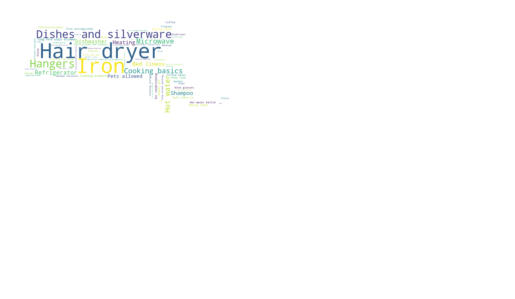

In [4]:
mask = np.array(Image.open(path.join("mass_outline.png")))
wordcloud = WordCloud(background_color="white", width=800, height=400, mask=mask).generate_from_frequencies(word_freq_high)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

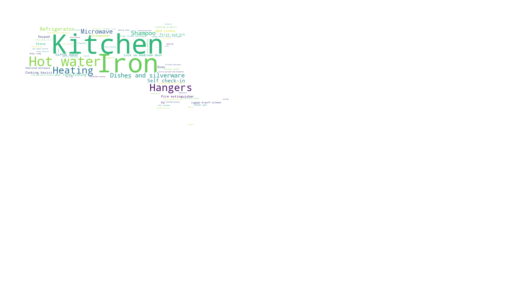

In [5]:
wordcloud = WordCloud(background_color="white", width=800, height=400, mask=mask).generate_from_frequencies(word_freq_low)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
# # select neighborhood

# listings_filt = listings.loc[listings['census_NBH'] == 'East Boston'].reset_index()

# ammenities = listings_filt['amenities']
# ammenities

# amm_string=(" ").join(ammenities)

# image_mask = np.array(Image.open("logo.png"))

# wordcloud = WordCloud(width = 800, height = 500, background_color='white', colormap = 'Oranges', max_font_size=250, stopwords=set(),random_state=42,\
#                       mask=image_mask,contour_width=10,contour_color='lightcoral', max_words = 200)

# wordcloud.generate(combined_str)
# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

In [7]:
# # select tract

# listings_filt = listings.loc[listings['census_tract'] == 512].reset_index()

# ammenities = listings_filt['amenities']
# ammenities

# amm_string=(" ").join(ammenities)

# image_mask = np.array(Image.open("logo.png"))

# wordcloud = WordCloud(width = 800, height = 500, background_color='white', colormap = 'Blues', max_font_size=250, stopwords=set(),random_state=42,\
#                       mask=image_mask,contour_width=10,contour_color='lightcoral', max_words = 200)

# wordcloud.generate(amm_string)
# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

# Addition from word cloud documentation example

In [8]:
# # set d to working directory path
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# # read example text
# text = open(path.join(d, 'alice.txt')).read()

# # Read the whole text.
# text = open(path.join(d, 'alice.txt')).read()

# # read the mask image
# # taken from
# # http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
# alice_mask = np.array(Image.open(path.join(d, "mass_outline.png")))

# stopwords = set(STOPWORDS)
# stopwords.add("said")

# wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
#                stopwords=stopwords, contour_width=0, contour_color='steelblue')

# # generate word cloud
# wc.generate(amm_string)

# # store to file
# wc.to_file(path.join(d, "TEST.png"))

# # show
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.figure()
# plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()